# Regularized Linear Regression and Bias vs. Variance

In [1]:
import numpy as np
from scipy.io import loadmat   # to read MATLAB data file '.mat'
import matplotlib.pyplot as pl
%matplotlib inline

-48.0588294526 37.492187332
X shape:  (12,)
y shape:  (12,)
new shape of X:  (12, 2)
theta shape:  (2,)
shape of dot product ()
shape of dot produc2 (12,)


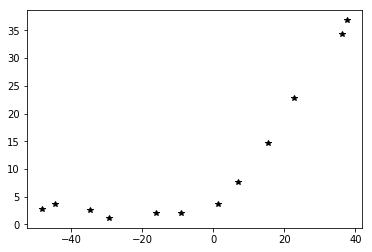

In [2]:
data = loadmat('ex5data1.mat')
X = data['X'][:,0] # (12,)
print(np.amin(X), np.amax(X))
y = data['y'][:,0] # (12,)
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X = np.c_[np.ones(X.shape[0]), X] # (12,2)
# checking dimension of arrays 
print('new shape of X: ', X.shape)
theta = np.ones((X.shape[1]))
print('theta shape: ', theta.shape)
print('shape of dot product', (y.T.dot(y)).shape)
print('shape of dot produc2', (X.dot(theta)).shape)
pl.plot(X[:,1],y, 'k*', linewidth=2)
pl.show()

Should $\theta$ be the first paramter?
Ans. : Yes

In [3]:
def cost(theta, X,y,reg):
    """ Linear regression cost function"""
    h = X.dot(theta)
    #print(h.shape)
    M = y.shape[0]
    aux = (h - y).T.dot((h-y)) + reg*(theta[1:].T.dot(theta[1:]))
    #print('cost aux shape', aux.shape)
    
    return aux/(2*M)
    

In [4]:
reg = 1.
print('cost is: ', cost(theta, X,y,reg))

cost is:  303.99319222


In [5]:
def cost_grad(theta, X,y,reg):
    "Partial derivative of the linear regression cost function"
    h = X.dot(theta)
    M = y.shape[0]
    aux = X.T.dot(h - y) + reg*np.r_[0,theta[1:]]
    #print('grad aux shape', aux.shape)
    return aux.ravel()/M

In [6]:
print(cost_grad(theta, X,y,1))

[ -15.30301567  598.25074417]


(2, 1) [[ 0.83088975]
 [ 0.7128521 ]]
[ 13.08771416   0.367742  ]


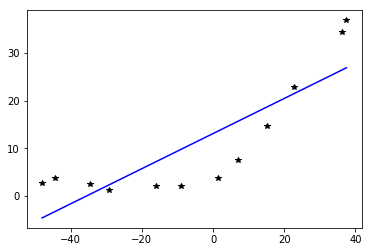

In [7]:
theta0 = np.random.rand(2,1)
print(theta0.shape, theta0)
# optimization library
from scipy.optimize import minimize
# minimizing the cost function to fit theta
# args: non-fitting paramter
res = minimize(cost, theta0, args=(X,y,reg), method=None, 
               jac=cost_grad, options={'maxiter':50})
print(res.x)
pl.plot(X[:,1],y,'*k')
Xf = np.linspace(np.amin(X[:,1]),np.amax(X[:,1]),100)
yf = res.x[0] + res.x[1]*Xf
pl.plot(Xf,yf,'-b')


#### Bias-Variance tradeoff
Models with high bias are not complex enough for the data and tend to underfit, while
models with high variance overfit to the training data.

##### Learning curves

X_crs shape:  21
y_crs shape:  21


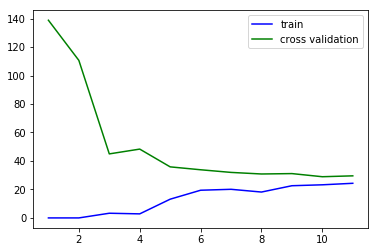

In [8]:
X_crs = data['Xval'][:,0]
X_crs = np.c_[np.ones(X_crs.shape[0]), X_crs]
print('X_crs shape: ', X_crs.shape[0])
y_crs = data['yval'][:,0]
print('y_crs shape: ', y_crs.shape[0])
err_train = []
err_val = []
theta0 = np.random.rand(2,1)
reg = 1
for i in range(1,X.shape[0]):
    X_sub = X[0:i,:]
    y_sub = y[0:i]
    res = minimize(cost, theta0, args=(X_sub,y_sub,reg), method=None,
                  jac=cost_grad, options={'maxiter':50})
    theta = res.x
    err_train.append(cost(theta, X_sub, y_sub, 0))
    err_val.append(cost(theta, X_crs, y_crs, 0))
    
train_num = range(1,X.shape[0])
pl.plot(train_num, err_train, 'b-',label='train')
pl.plot(train_num, err_val, 'g-', label='cross validation')
pl.legend()

We can observe that both the train error and cross validation
error are high when the number of training examples is increased. This
reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well.

#### Polynomial regression

Let $x=\text{waterLevel}$ and define various power of $x^n$ as new feature $x_n$. The new hypothesis would be 

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_p x_p  $$

In [9]:
def poly_generate(X,p):
    """to generate more features by calculating higher power of the 
    original value of X"""
    X_poly = np.zeros((X.shape[0],p))
    for i in range(p):
        X_poly[:,i] = X[:]**(i+1)

    return X_poly


In [10]:
# no bias term, original X
X = data['X'][:,0]
XPoly = poly_generate(X,3)

Even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem.

In [11]:
def feature_normalize(X_poly):
    """to normalize each feature in X where the mean value
    of each feature is 0 and the standard deviation is 1. 
    """
    # for each feature calculate mean and std
    for i in range(X_poly.shape[1]):
        xm = np.mean(X_poly[:,i])
        xstd = np.std(X_poly[:,i])
        X_poly[:,i] = (X_poly[:,i]-xm)/xstd
        
    return X_poly
  

In [12]:
X = data['X'][:,0]
y = data['y'][:,0]
XPoly = poly_generate(X,8)
XNorm = feature_normalize(XPoly)
XNorm = np.c_[np.ones(XNorm.shape[0]),XNorm]

(100,)


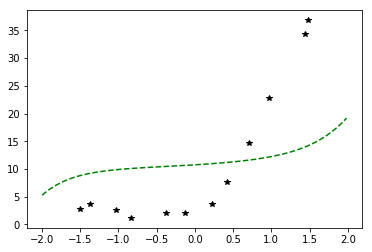

In [13]:
# training with zero regularization reg=0
reg = 100.5
theta0 = np.random.rand(9)
resP = minimize(cost, theta0,args=(XNorm,y, reg), method=None,
                jac=cost_grad, options={'maxiter':100})
theta = resP.x                

pl.plot(XNorm[:,1],y,'*k')
Xf = np.linspace(np.amin(XNorm[:,1])-0.5,np.amax(XNorm[:,1])+0.5,100)
print(Xf.shape)
XPoly = poly_generate(Xf,8)
XNorm = feature_normalize(XPoly)
XNorm = np.c_[np.ones(XNorm.shape[0]),XNorm]

#def y_predict(theta,Xf):
#    y = np.zeros((Xf.size))
#    for i in range(XNorm.shape[1]):
#        y += theta[i]*(Xf**i)
#    return y

yf = XNorm.dot(theta)

pl.plot(Xf,yf, 'g--')
#pl.plot(Xf,yf,'-b')

